### Upper Confidence Bound (UCB)

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#### Importing the dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
dataset.head(n=10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


#### Implementing UCB

In [7]:
# The number of times ad i was selected up to n rounds(Ni_n)
number_of_selections = np.zeros(shape=10, dtype=int)
# The sum of rewards of the ad i up to n rounds(Ri_n)
sums_of_rewards = np.zeros(shape=10, dtype=int)
# The total number of users
N = 10_000
# The total number of ads
d = 10
# Result from each iteration 
ads_selected = []
# Sum of rewards received at each round
total_reward = 0

# Running the loop over all the rounds, that is all the users who clicked the ads
for n in range(0, N):
    # Current ad
    ad = 0
    # Maximum upper bound for every user iteration
    max_upper_bound = 0
    # Looping over all the ads
    for i in range(0,d):
        if(number_of_selections[i]>0):
            # Average reward
            average_reward = sums_of_rewards[i]/number_of_selections[i]
            # Confidence interval
            delta_i = math.sqrt((3/2)*(math.log(n+1)/number_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            # Setting upper bound to maximum
            upper_bound = 1e400

        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [10]:
# Initialize counters for each ad
# Example: for 10 ads, initialize all selections to 0
number_of_selections = np.zeros(shape=10, dtype=int)

# Initialize rewards sum for each ad
# Example: for 10 ads, initialize all rewards to 0
sums_of_rewards = np.zeros(shape=10, dtype=int)

# Set the number of rounds (or trials)
# Example: N = 10,000 means we will run the ad selection process 10,000 times
N = 10_000

# Number of ads
# Example: d = 10 means there are 10 different ads to select from
d = 10

# Track the ads selected in each round
ads_selected = []

# Initialize total reward
total_reward = 0

# Loop through each trial
for n in range(0, N):
    # Initialize variables for selecting the best ad in this trial
    ad = 0
    max_upper_bound = 0

    # Loop through each ad to calculate its UCB value
    for i in range(0, d):
        # If the ad has been selected at least once
        if number_of_selections[i] > 0:
            # Calculate average reward for this ad
            # Example: if ad 1 has been selected 5 times and got 10 rewards in total,
            # average_reward = 10 / 5 = 2
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            
            # Calculate the confidence interval (uncertainty) for this ad
            # delta_i gets smaller as an ad is selected more often
            # Example: If ad 1 was selected in 100 trials and n is now 500, delta_i would be lower
            delta_i = math.sqrt((3/2) * (math.log(n + 1) / number_of_selections[i]))
            
            # Calculate the upper confidence bound
            # Example: UCB = average_reward + delta_i
            upper_bound = average_reward + delta_i
        else:
            # If the ad has never been selected, assign a very high UCB to ensure it’s selected
            # This ensures every ad is tried at least once
            upper_bound = 1e400  # Essentially infinity to guarantee selection

        # Compare this ad's UCB with the current max UCB
        # Update `ad` and `max_upper_bound` if this ad has the highest UCB so far
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    # Add the chosen ad to the list of selected ads
    ads_selected.append(ad)

    # Update the count of selections for the chosen ad
    number_of_selections[ad] += 1

    # Retrieve the reward for the chosen ad from the dataset
    # Example: if ad 1 was clicked, reward = 1; otherwise reward = 0
    reward = dataset.values[n, ad]

    # Update the total reward sum for this ad
    sums_of_rewards[ad] += reward

    # Add the reward to the total reward count
    total_reward += reward

# Example after the loop:
# - `ads_selected` contains a list of the chosen ads for each trial (e.g., [1, 4, 0, ...])
# - `number_of_selections` might look like [500, 1200, 800, ...] showing how many times each ad was selected
# - `sums_of_rewards` might look like [250, 600, 400, ...] showing the rewards each ad accumulated
# - `total_reward` gives the cumulative reward across all trials
'''
Summary of Examples
First few trials: Since all ads start with high upper bounds (due to being unselected), each ad will get selected once. For instance, in round 1, ad 1 might be selected and then ad 2 in round 2, etc.
Midway through the trials: Ads that yield higher rewards will have higher UCB values and will be selected more frequently.
Towards the end: The algorithm will primarily select the ads that have shown the highest reward rates, as their confidence bounds narrow, balancing exploitation of known rewards with occasional exploration.
'''

'\nSummary of Examples\nFirst few trials: Since all ads start with high upper bounds (due to being unselected), each ad will get selected once. For instance, in round 1, ad 1 might be selected and then ad 2 in round 2, etc.\nMidway through the trials: Ads that yield higher rewards will have higher UCB values and will be selected more frequently.\nTowards the end: The algorithm will primarily select the ads that have shown the highest reward rates, as their confidence bounds narrow, balancing exploitation of known rewards with occasional exploration.\n'

#### Visualising the results

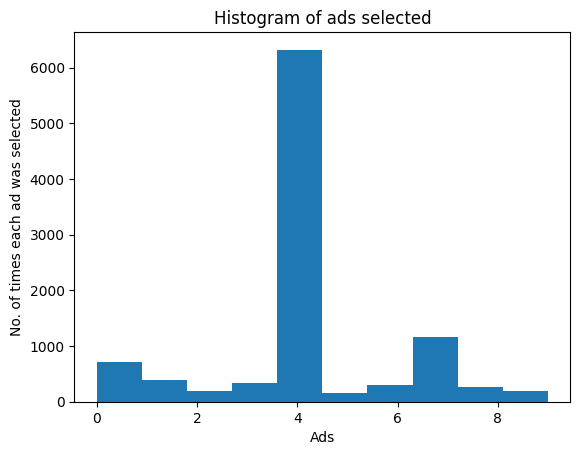

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('No. of times each ad was selected')
plt.show()